In [41]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
import re
import datetime
import os

%matplotlib inline
print(os.listdir("input"))

['.DS_Store', 'listings.csv']


# Explore the datasets

In [42]:
df_listing = pd.read_csv("input/listings.csv")
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
print("listing.csv has {} rows and {} columns.".format(df_listing.shape[0], df_listing.shape[1]))

listing.csv has 3818 rows and 92 columns.


In [6]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


## Deal with Missing Values and Feature Engineering

### The dataset still has 79 features, and we should only retain the  features that are valuable in predicting the price of a listing. Those columns are: 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes',  'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'square_feet', 'host_is_superhost', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture'. The target column is 'price'.
The dataset has 92 features. Let's clean the data, and retain the most valuable features.
- Description -- name, summary, space, description
- Host -- host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost
- Home -- neighbourhood_group_cleansed, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities
- Other factors -- price, security_deposit, cleaning_fee, extra_people, minimum_nights, maximum_nights, instant_bookable, cancellation_policy, number_of_reviews
- Target -- review_scores_rating|

In [7]:
clean_df = df_listing.loc[:, ['name', 'summary', 'space', 'description', 'neighborhood_overview', \
                              'notes', 'host_since', 'host_about', 'host_response_time', \
                              'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', \
                              'square_feet', 'host_listings_count', 'host_verifications', \
                              'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', \
                              'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', \
                              'beds', 'bed_type', 'amenities', 'minimum_nights', 'maximum_nights', \
                              'availability_90', 'number_of_reviews', 'review_scores_rating', \
                              'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', \
                              'price']]

In [8]:
# drop rows with the target value missing, our target is review_scores_rating
clean_df.dropna(subset=['price'], axis=0, inplace=True)

# drop columns with all missing values
clean_df.dropna(axis=1, how='all', inplace=True)

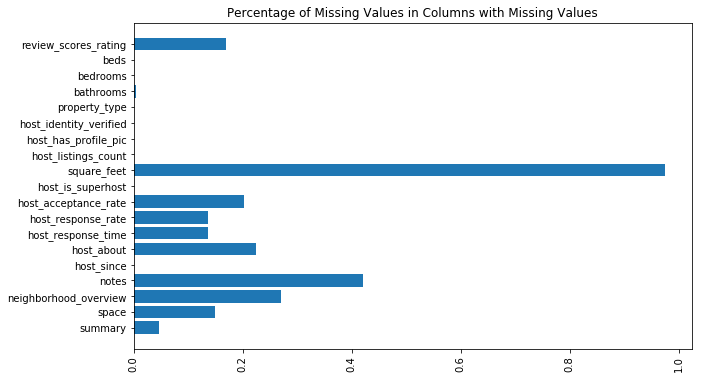

In [9]:
# plt.bar(x=df_listing[df_listing.isnull().sum()>0].columns, height=df_listing.isnull().sum()>0);
# plt.xticks(rotation=90);
columns_missing_value = clean_df.columns[clean_df.isnull().any()]
columns_missing_value_portion = clean_df[columns_missing_value].isnull().sum() / clean_df.shape[0]
plt.figure(figsize=(10,6))
plt.barh(columns_missing_value, columns_missing_value_portion);
plt.xticks(rotation=90);
plt.title("Percentage of Missing Values in Columns with Missing Values");

In [10]:
# drop 'square_feet' column, since it has more than 90% of missing values
clean_df.drop(['square_feet'], axis=1, inplace=True)

In [11]:
# drop columns contain the same value, they have no predicting power
cols_same_val = clean_df.columns[clean_df.nunique() == 1]
clean_df.drop(cols_same_val, axis=1, inplace=True)

In [12]:
print('The clean dataset now has {} features.'.format(clean_df.shape[1]))

The clean dataset now has 34 features.


In [13]:
# Convert 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'host_about'
# to the number of words
def str_to_len(string):
    if string is not np.nan:
        num = len(string.split())
        return num
    else:
        return 0
    
description_columns = ['name', 'summary', 'space', 'description', 'neighborhood_overview', \
                       'notes', 'host_about']

# add new columns contain the number of words 
for col in description_columns:
    new_col = col + '_len'
    clean_df[new_col] = clean_df[col].apply(str_to_len)
    
# drop original columns
clean_df.drop(description_columns, axis=1, inplace=True)

In [14]:
# take a look at unique values in each column, and perform proper feature engineering
for col in clean_df:
    if col not in description_columns:
        print('Column name: {}'.format(col))
        print('Data type: {}'.format(clean_df[col].dtypes))
        print('Unique values: {}'.format(clean_df[col].unique()))

Column name: host_since
Data type: object
Unique values: ['2011-08-11' '2013-02-21' '2014-06-12' ... '2011-03-27' '2015-12-30'
 '2014-04-25']
Column name: host_response_time
Data type: object
Unique values: ['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']
Column name: host_response_rate
Data type: object
Unique values: ['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%' '90%' '70%'
 '88%' '80%' '63%' '33%' '99%' '75%' '83%' '94%' '58%' '43%' '93%' '92%'
 '40%' '57%' '89%' '95%' '78%' '81%' '91%' '38%' '86%' '30%' '56%' '76%'
 '64%' '82%' '17%' '87%' '25%' '69%' '53%' '65%' '68%' '55%']
Column name: host_acceptance_rate
Data type: object
Unique values: ['100%' nan '0%']
Column name: host_is_superhost
Data type: object
Unique values: ['f' 't' nan]
Column name: host_listings_count
Data type: float64
Unique values: [  3.   6.   2.   1.   5.   9.   4.  36. 354.   8.  37.   7.  34.  10.
  13.  21.  11. 169.  48. 502.  12.  nan  18.  19.  15.  84. 163. 

In [15]:
#  Convert 'host_since' to number of years of being a host
def host_since_to_days(delta):
    return delta.days

clean_df['host_days'] = (datetime.datetime.now() - \
                         pd.to_datetime(clean_df.host_since, \
                                        format='%Y-%m-%d', errors='ignore')).apply(host_since_to_days)
clean_df.drop(['host_since'], axis=1, inplace=True)

In [16]:
# Convert host_response_time to ordinal integers
# host responds quicker should have higher score
clean_df.host_response_time.replace('a few days or more', 1, inplace=True)
clean_df.host_response_time.replace('within a day', 2, inplace=True)
clean_df.host_response_time.replace('within a few hours', 3, inplace=True)
clean_df.host_response_time.replace('within an hour', 4, inplace=True)

In [17]:
# Convert host_response_rate and host_acceptance_rate to float
def str_to_float(string):
    #print(string is np.nan)
    if string is not np.nan:
        num = float(string[:-1])
        return num / 100.0
    else:
        return string

clean_df.host_response_rate = clean_df.host_response_rate.apply(str_to_float)
clean_df.host_acceptance_rate = clean_df.host_acceptance_rate.apply(str_to_float)

In [18]:
# convert host_verifications to number of verification methods
# convert amenities to number of amenities in a listing
def list_to_int(val):
    if val is not np.nan:
        num = len(val.split(','))
    else:
        num = 0
    return num

clean_df.host_verifications = clean_df.host_verifications.apply(list_to_int)
clean_df.amenities = clean_df.amenities.apply(list_to_int)

In [19]:
# Convert cancellation_policy to ordinal integers
# the more flexible cacellation policy should have higher score
clean_df.cancellation_policy.replace('strict', 1, inplace=True)
clean_df.cancellation_policy.replace('moderate', 2, inplace=True)
clean_df.cancellation_policy.replace('flexible', 3, inplace=True)

In [20]:
# Convert price to float
def price_to_float(price):
    if price is not np.nan:
        price = price[1:-2]
        num = re.findall('\d+',price) 
        #if len(num) > 1:
        num = float(''.join(num))
        return num
    else:
        return price

clean_df.price = clean_df.price.apply(price_to_float)

In [21]:
# take a look at unique values in each column, and perform proper feature engineering
for col in clean_df:
    if col not in description_columns:
        print('Column name: {}'.format(col))
        print('Data type: {}'.format(clean_df[col].dtypes))
        print('Unique values: {}'.format(clean_df[col].unique()))

Column name: host_response_time
Data type: float64
Unique values: [ 3.  4. nan  2.  1.]
Column name: host_response_rate
Data type: float64
Unique values: [0.96 0.98 0.67  nan 1.   0.71 0.97 0.6  0.5  0.31 0.9  0.7  0.88 0.8
 0.63 0.33 0.99 0.75 0.83 0.94 0.58 0.43 0.93 0.92 0.4  0.57 0.89 0.95
 0.78 0.81 0.91 0.38 0.86 0.3  0.56 0.76 0.64 0.82 0.17 0.87 0.25 0.69
 0.53 0.65 0.68 0.55]
Column name: host_acceptance_rate
Data type: float64
Unique values: [ 1. nan  0.]
Column name: host_is_superhost
Data type: object
Unique values: ['f' 't' nan]
Column name: host_listings_count
Data type: float64
Unique values: [  3.   6.   2.   1.   5.   9.   4.  36. 354.   8.  37.   7.  34.  10.
  13.  21.  11. 169.  48. 502.  12.  nan  18.  19.  15.  84. 163.  17.]
Column name: host_verifications
Data type: int64
Unique values: [4 6 5 7 3 2 1 8]
Column name: host_has_profile_pic
Data type: object
Unique values: ['t' 'f' nan]
Column name: host_identity_verified
Data type: object
Unique values: ['t' 'f' n

In [22]:
## Creat new columns to keep track of missing values
for col in clean_df.columns:
    if clean_df[col].isnull().sum() > 0:
        new_col = col + '_missing'
        clean_df[new_col] = clean_df[col].isnull()
        clean_df[new_col].replace(True,1, inplace=True)
        clean_df[new_col].replace(False,0, inplace=True)
    

In [23]:
# fill missing values in numeric columns with mean value
for col in clean_df.select_dtypes(exclude=['object']).columns:
    if clean_df[col].isnull().sum() >0:
        clean_df[col].fillna(value=clean_df[col].mean(), inplace=True)

##  Which neighborhoods has the most expensive listings?
Here you can see in descending order the difference between mean listing price per neighborhood and the overall mean listing price for the entire Seattle area. The average listing price in Seattle is about \$128. The ** top 3 ** most expensive areas  are ** Magnolia, Queen Anne and Downtown **. The average listing price for Magnolia is more than \$49 over the average listing price for the entire Seattle, \$29 more for the Queen Anne area, and \$26 more for the downtown area.


In [24]:
clean_df.price.mean()

127.97616553169199

neighbourhood_group_cleansed
Delridge              -44.697685
Northgate             -39.426166
Rainier Valley        -36.076794
Lake City             -35.304524
University District   -34.336821
Beacon Hill           -33.306674
Seward Park           -19.498893
Interbay              -18.248893
Other neighborhoods    -8.007652
Ballard                -3.293557
Central Area            0.362588
Capitol Hill            2.616427
Cascade                12.124958
West Seattle           13.383440
Downtown               26.429495
Queen Anne             29.247563
Magnolia               49.695966
Name: price, dtype: float64

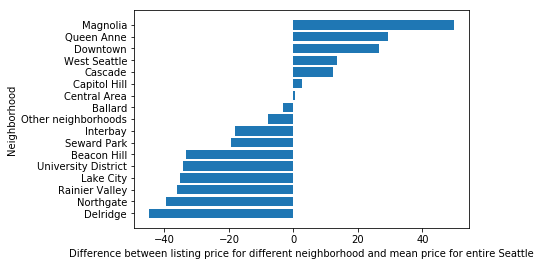

In [25]:
plt.xlabel('Difference between listing price for different neighborhood and mean price for entire Seattle');
plt.ylabel('Neighborhood');
xheight = (clean_df.groupby('neighbourhood_group_cleansed').mean()['price']-clean_df.price.mean()).sort_values()
plt.barh([i+1 for i in range(17)], xheight);
plt.yticks([i+1 for i in range(17)], xheight.index);
xheight

## What are the portions of best reviewed listings in different neighbourhood?
From the review score distribution below, the distribution is left skewed, the top 25% of the listings have a review score over 98. Below is a visualization the portion of listings with review score higher than 98 in descending order. The clear leaders are the Central area, West Seattle, and Queen Anne . The central area has more than 33% of listings that are highly reviewed, 27.5% for west seattle and 27.1% for Queen Anne.

count    3818.000000
mean       94.539262
std         6.020223
min        20.000000
25%        94.000000
50%        95.000000
75%        98.000000
max       100.000000
Name: review_scores_rating, dtype: float64

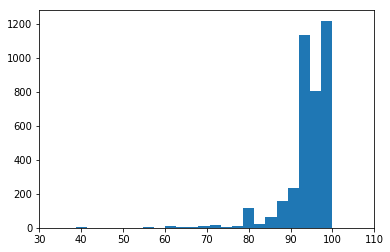

In [26]:
# in oder to determine what is the best reviewed score, let's take a look at the review score distribution
plt.hist(clean_df.review_scores_rating, bins=30);
plt.xlim(30,110);
clean_df.review_scores_rating.describe()

neighbourhood_group_cleansed
University District    0.163934
Interbay               0.181818
Beacon Hill            0.186441
Downtown               0.200000
Ballard                0.204348
Cascade                0.213483
Rainier Valley         0.213836
Other neighborhoods    0.243073
Magnolia               0.245902
Capitol Hill           0.246914
Seward Park            0.250000
Northgate              0.250000
Delridge               0.253165
Lake City              0.253731
Queen Anne             0.271186
West Seattle           0.275862
Central Area           0.338753
Name: review_scores_rating, dtype: float64

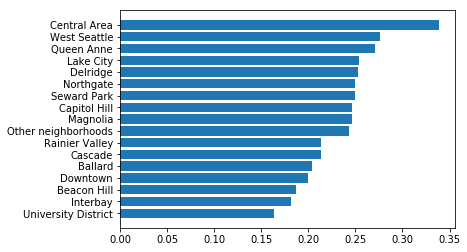

In [27]:
# in each neighbourhood, what is the portion of listing with review score higher than 98?
count_neighbourhood = clean_df.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].count()
count_high_review_neighbourhood = clean_df.query('review_scores_rating > 98').groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].count()
portion_high_review_neighbourhood = count_high_review_neighbourhood / count_neighbourhood 
sorted_portion = portion_high_review_neighbourhood.sort_values()

plt.barh([i+1 for i in range(len(sorted_portion))], sorted_portion);
plt.yticks([i+1 for i in range(len(sorted_portion))], sorted_portion.index);
sorted_portion

Interestingly, we noticed that the most pricey area like Magnolia and Downtown, both have less than 25% of listings that highly reviewed.
## What is the property type distribution over different neighborhoods?

In [28]:
clean_df.groupby(['property_type', 'neighbourhood_group_cleansed']).mean()['price']

property_type    neighbourhood_group_cleansed
Apartment        Ballard                         108.066667
                 Beacon Hill                      84.608696
                 Capitol Hill                    119.176966
                 Cascade                         123.808824
                 Central Area                    103.235294
                 Delridge                         98.333333
                 Downtown                        153.989339
                 Interbay                        131.250000
                 Lake City                        87.636364
                 Magnolia                        151.833333
                 Northgate                        86.629630
                 Other neighborhoods             107.212766
                 Queen Anne                      123.497041
                 Rainier Valley                   93.133333
                 Seward Park                      86.000000
                 University District              92.9

In [29]:
gb1=clean_df.groupby(['property_type', 'neighbourhood_group_cleansed'])['price']

dict_gb = defaultdict(list)
for k in gb1.apply(list).to_dict():
    dict_gb[k[0]].append((k[1], np.mean(gb1.apply(list).to_dict()[k])))

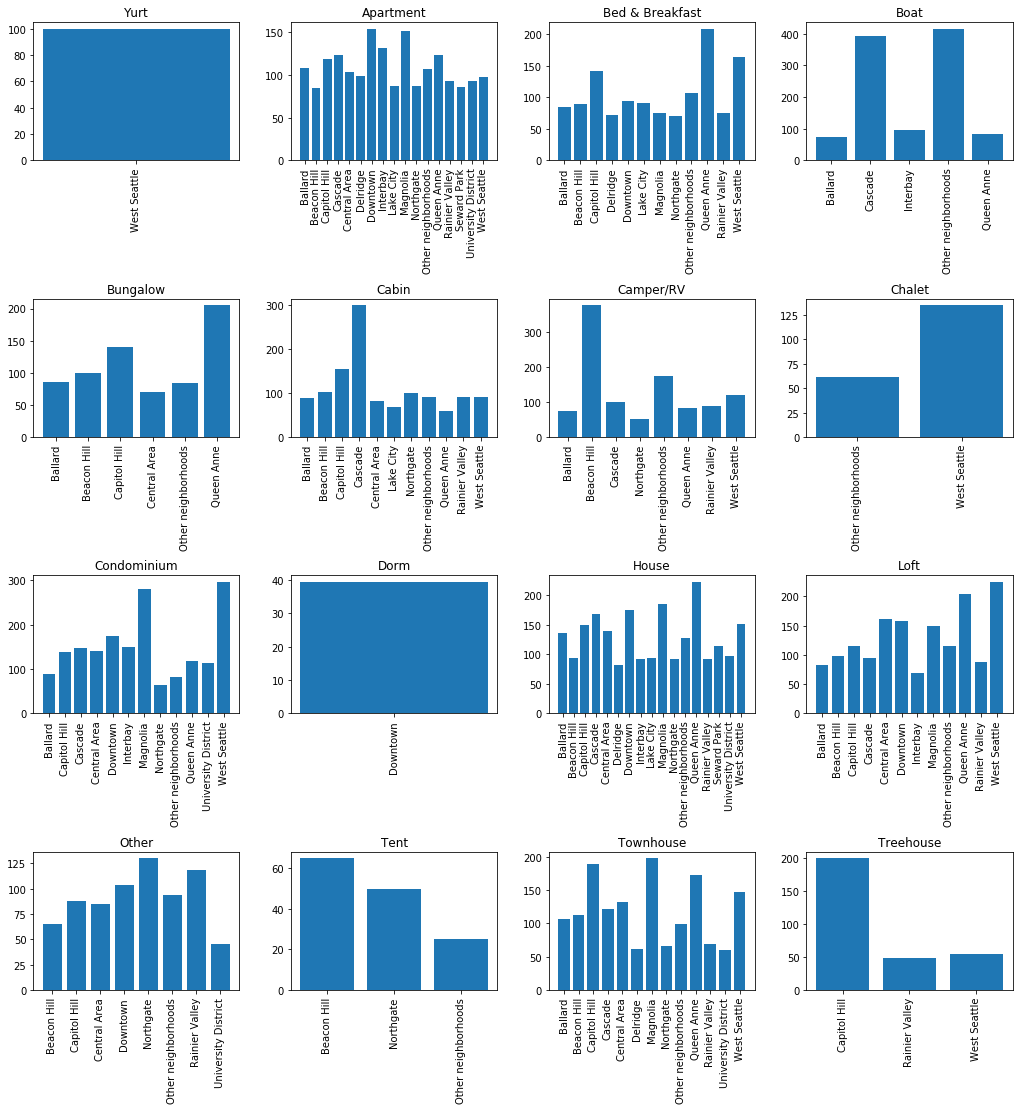

In [30]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
i = 0
j=0
for p in dict_gb:

    title = p
    xlabel = list()
    values = list()
    for (n, v) in dict_gb[p]:
        xlabel.append(n)
        values.append(v)

    j += 1
    if j%4 == 0:
        j = 0
        i += 1
        if i % 4==0:
            i = 0

    ax[i, j].bar(xlabel, values)
    ax[i, j].set_title(p)
    ax[i, j].xaxis.set_tick_params(rotation=90)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1,
                    wspace=0.25 )

    

The above 16 plots show the distribution over different neighbourhood for a specific property type. The distributions are drastically different for different property type. Interestingly, but not too surprisingly, you can only find dorm-type Airbnb listing in downtown Seattle. This makes sense given that downtown area is usually crowded with non-residential building like, office buildings, shopping centers and etc. Another interesting finding is that only the west Seattle area provide Yurt, which is a circular tent. This also makes sense, since west Seattle area is full of parks and green spaces, which is great for camping.

In [31]:
# get dummy variables for categorical data
df = pd.get_dummies(clean_df, drop_first=True, )

In [32]:
print('There are {} features in the dataset now.'.format(df.shape[1] - 1))

There are 79 features in the dataset now.


# Create model to predict listing price
Use Random Forest Regression to predict the listing price.

In [33]:
# first split data into features and targets
y = df.price
X = df.drop(['price'], axis=1)

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [34]:
# Apply feature scaling to the train and test data
X_train_scale = StandardScaler().fit_transform(X_train)
X_test_scale = StandardScaler().fit_transform(X_test)

Having an imputed and scaled dataset with a mean of zero and standard deviation 1. The dataset is separated into target y (price), and features X.  X and y are split into a training and testing set of 0.7:0.3 ratio, keep a random state 42. Now we will use Random Forest Regression to perform predictions. 


In [35]:
rf = RandomForestRegressor()
rf.fit(X_train_scale, y_train)
# rf.score(X_train_scale, y_train), rf.score(X_test_scale, y_test), rf.n_estimators
print('The r-2 score for training data is {}.'.format(r2_score(y_train, rf.predict(X_train_scale))))
print('The r-2 score for training data is {}.'.format(r2_score(y_test, rf.predict(X_test_scale))))

The r-2 score for training data is 0.9185209712431888.
The r-2 score for training data is 0.5430455475468754.


Our model is doing great on the train dataset, but not good at the test set. We should do model tuning.


In [36]:
# use gridsearch to search for the best fit parameters
rf_reg = RandomForestRegressor(random_state=42)

parameters = {'n_estimators':[i for i in range(1, 30)], \
                           'max_depth':[4, 8, 16, 32, 64], \
                           'min_samples_leaf':[1,2,4,8, 16]}

# scorer = make_scorer(r2_score)

grid_obj = GridSearchCV(rf_reg, parameters, cv=4)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_scale, y_train)

# Get the estimator
best_reg = grid_fit.best_estimator_


In [37]:
# Make predictions using the unoptimized and best model
predictions = (rf.fit(X_train_scale, y_train)).predict(X_test_scale)
best_predictions = best_reg.predict(X_test_scale)

print('The r-2 score for unoptimized model is {}.'.format(r2_score(y_test, predictions)))
print('The r-2 score for optimized model is {}.'.format(r2_score(y_test, best_predictions)))

The r-2 score for unoptimized model is 0.5490691967000461.
The r-2 score for optimized model is 0.6010674648409522.


After parameters tuning, r2-score on the test dataset is improved from 0.528 to 0.601.

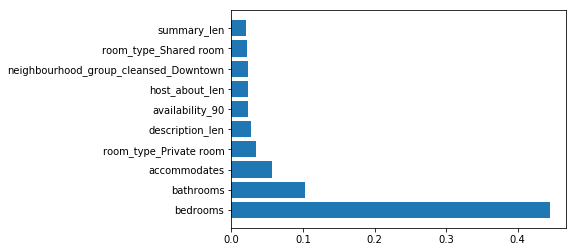

In [38]:
# plot feature importance of the best model
feature_df = pd.DataFrame({'feature_importance':best_reg.feature_importances_}, index=X.columns)
xlabels = feature_df.feature_importance.sort_values(ascending=False).index[:10]
values = feature_df.feature_importance.sort_values(ascending=False).head(10)

plt.barh(xlabels, values);

# Concolusion
The trained model was able to predict quality with r2 score of 0.6. The algorithm showed that major features that impact listing price are number of bedrooms and bathrooms. Not surprisingly, the next features that affect rating the most is number of accomodates. Interestingly forth most important features is private room type
